We first read the sample file and convert it to json format. We first read the sample file and convert it to json format

In [23]:
import pandas as pd
ts = pd.read_csv("uc6_datasets/W6 positive_active.csv",
                     sep=None,
                     header=0,
                     index_col=0,
                     parse_dates=True,
                     engine='python')
ts = ts[ts.index >= pd.Timestamp("2023-01-01 00:00:00")]
series = ts.to_json()

Then we make the request using the time horizon (n), series in json format (series) and meter_id (meter_id) we want

In [24]:
import requests

from requests_toolbelt.multipart.encoder import MultipartEncoder
input_example = MultipartEncoder(
    fields={"n": "150",
            "series": series,
            "series_id": "W6 positive_active",
           }
)

result = requests.post(
    "http://0.0.0.0:3090/predict_uc6", data=input_example, headers={"Content-Type": input_example.content_type}
).text

In [25]:
result

'{"Value":{"1700697600000":0.018,"1700701200000":0.018,"1700704800000":0.018,"1700708400000":0.018,"1700712000000":0.018,"1700715600000":0.018,"1700719200000":0.018,"1700722800000":-0.7653918029,"1700726400000":-10.0314172801,"1700730000000":-18.6101872069,"1700733600000":-23.6211830222,"1700737200000":-25.3576120306,"1700740800000":-23.7719049269,"1700744400000":-19.0726157477,"1700748000000":-11.4748214487,"1700751600000":-3.7655795666,"1700755200000":0.018,"1700758800000":0.018,"1700762400000":0.018,"1700766000000":0.018,"1700769600000":0.018,"1700773200000":0.018,"1700776800000":0.018,"1700780400000":0.018,"1700784000000":0.018,"1700787600000":0.018,"1700791200000":0.018,"1700794800000":0.018,"1700798400000":0.018,"1700802000000":0.018,"1700805600000":0.018,"1700809200000":-0.5566579114,"1700812800000":-9.1894431025,"1700816400000":-15.8578521722,"1700820000000":-21.7502052107,"1700823600000":-23.748436966,"1700827200000":-23.5079073095,"1700830800000":-19.0090646187,"1700834400000

Finaly we convert the result to pandas format 

In [10]:
df = pd.read_json(result)

In [11]:
df

,Value
2023-11-23 00:00:00,0.018
2023-11-23 01:00:00,0.018
2023-11-23 02:00:00,0.018
2023-11-23 03:00:00,0.018
2023-11-23 04:00:00,0.018
...,...
2023-11-29 01:00:00,0.018
2023-11-29 02:00:00,0.018
2023-11-29 03:00:00,0.018
2023-11-29 04:00:00,0.018


<Axes: xlabel='Datetime'>

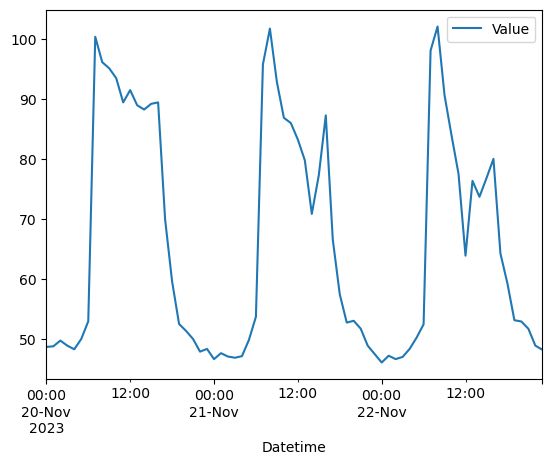

In [9]:
#W4 positive_active real
ts[ts.index >= pd.Timestamp("2023-11-20 00:00:00")].plot()

<Axes: >

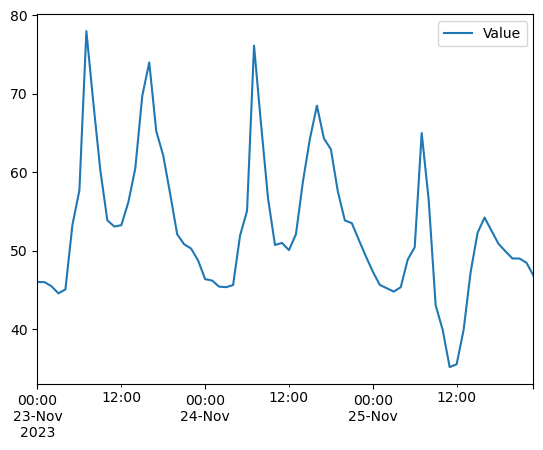

In [10]:
#W4 positive_active prediction
df.plot()

<Axes: xlabel='Datetime'>

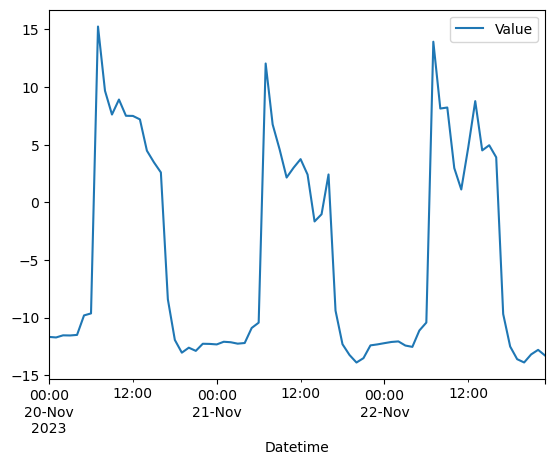

In [19]:
#W4 positive_reactive real
ts[ts.index >= pd.Timestamp("2023-11-20 00:00:00")].plot()

<Axes: >

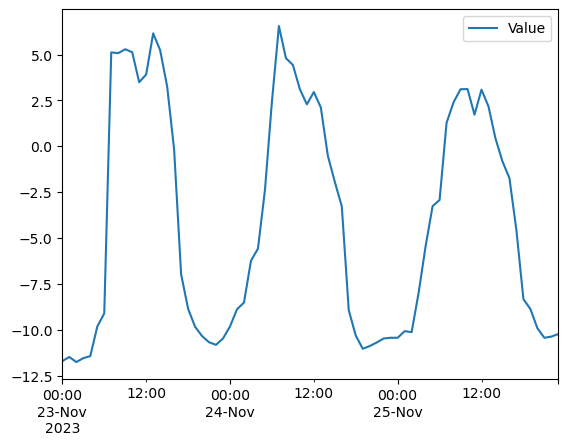

In [18]:
#W4 positive_reactive prediction
df.plot()

<Axes: xlabel='Datetime'>

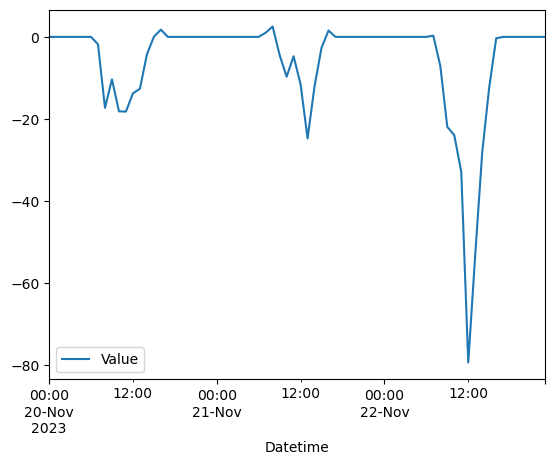

In [26]:
#W6 positive_active real
ts[ts.index >= pd.Timestamp("2023-11-20 00:00:00")].plot()

<Axes: >

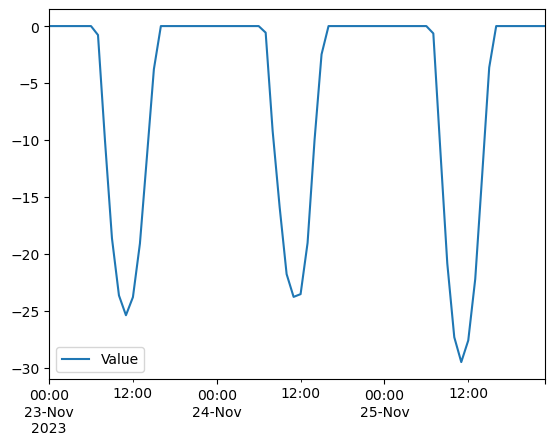

In [32]:
#W6 positive_active pred
df.plot()

<Axes: xlabel='Datetime'>

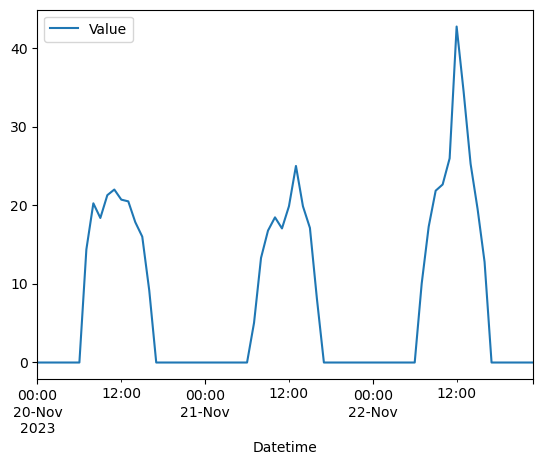

In [54]:
#W6 positive_reactive real
ts[ts.index >= pd.Timestamp("2023-11-20 00:00:00")].plot()

<Axes: >

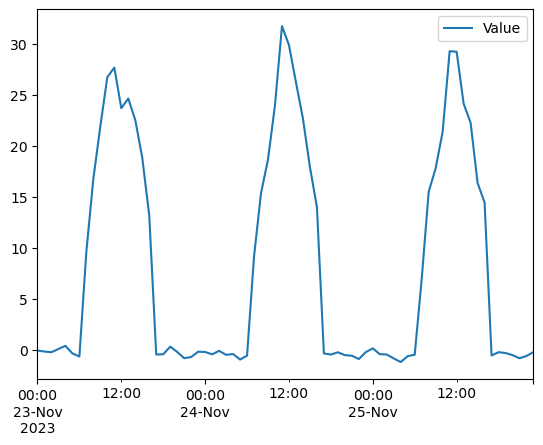

In [53]:
#W6 positive_reactive pred
df.plot()